## Exploratory Data Analysis

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
data_adult=pd.read_csv('C:/Users/Julia/Documents/_DATA SCIENCE/_Capstones/Capstone 2/Data/Data_adult.csv',index_col=0)
sns.set(style='ticks')
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore',category=pd.io.pytables.PerformanceWarning)

In [3]:
data_adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4313 entries, 0 to 4313
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4313 non-null   object 
 1   age                4313 non-null   float64
 2   hypertension       4313 non-null   int64  
 3   heart_disease      4313 non-null   int64  
 4   ever_married       4313 non-null   object 
 5   work_type          4313 non-null   object 
 6   Residence_type     4313 non-null   object 
 7   avg_glucose_level  4313 non-null   float64
 8   bmi                4130 non-null   float64
 9   smoking_status     4313 non-null   object 
 10  stroke             4313 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 404.3+ KB


## Target feature:
### Since the goal of this project is to predict occurence of stroke, target feature is 'stroke'. It has 2 values: 1 - when a patient had a stroke, and 0  - when a patient did not have a stroke.

In [4]:
data_adult['stroke'].value_counts(normalize=True)*100

0    94.273128
1     5.726872
Name: stroke, dtype: float64

In [5]:
data_adult['stroke'].value_counts()

0    4066
1     247
Name: stroke, dtype: int64

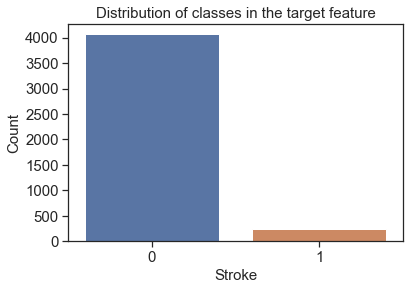

In [6]:
sns.countplot(data_adult['stroke'])
plt.title('Distribution of classes in the target feature',fontsize=15)
plt.xlabel('Stroke', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

### It is obvious that target feature is highly imbalanced with only ~ 5.72 % of samples having a value of 1. This is a major issue and may require application of specialized feature engineering techniques as well as careful model selection and it may affect a perfomance of a selected model. 

In [7]:
data_adult.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

### 'bmi' feature is the only one that has missing values

In [8]:
data_adult['bmi'].isna().sum()

183

In [9]:
percent_missing = data_adult['bmi'].isnull().sum() * 100 / len(data_adult)
print('Percentage of missing values in "bmi" feature:', round(percent_missing,2))

Percentage of missing values in "bmi" feature: 4.24


In [10]:
no_na = data_adult.dropna(subset="bmi")
no_na['stroke'].value_counts(normalize=True)*100

0    94.96368
1     5.03632
Name: stroke, dtype: float64

### Even though percentage of missing values in a dataset is relatively small, it is not a good idea to simply drop rows with missing values, as this will make target feature even more imbalanced.

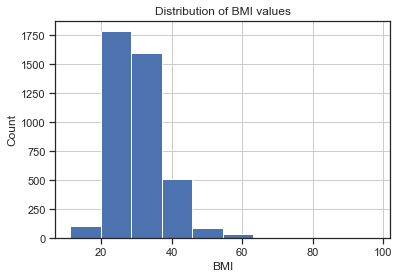

In [11]:
data_adult['bmi'].hist()
plt.title('Distribution of BMI values')
plt.xlabel('BMI')
plt.ylabel('Count');

### Distribution of 'bmi' values is skewed, meaning that we cannot impute missing values with the mean.

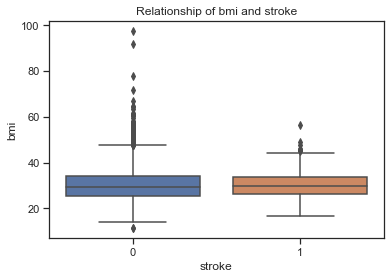

In [12]:
sns.boxplot(x="stroke", y="bmi", data=data_adult)
plt.title('Relationship of bmi and stroke');

### Since 'bmi' feature is scewed, the relationship between 'bmi' and target value is not clear. I think it would make sense to divide 'bmi' values into following categories:
* below 18.5 – underweight
* between 18.5 and 24.9 – healthy weight
* between 25 and 29.9 – overweight
* between 30 and 39.9 – obesity

In [13]:
for val in data_adult['bmi']:
    if val < 18.5:
        data_adult['bmi'].replace(to_replace=val, value='underweight', inplace=True)
    elif val >= 18.5 and val <= 24.9:
        data_adult['bmi'].replace(to_replace=val, value='normal', inplace=True)
    elif val >= 25 and val <= 29.9:
        data_adult['bmi'].replace(to_replace=val, value='overweight', inplace=True)
    elif val >= 30:
        data_adult['bmi'].replace(to_replace=val, value='obesity', inplace=True)

In [14]:
data_adult['bmi'].unique()

array(['obesity', nan, 'normal', 'overweight', 'underweight'],
      dtype=object)

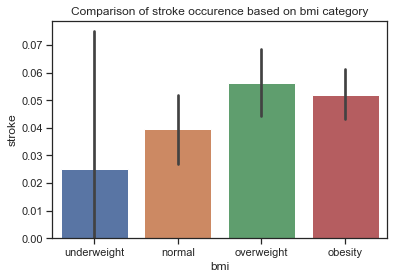

In [15]:
sns.barplot(x='bmi',y='stroke',data=data_adult, order=["underweight", "normal","overweight","obesity"])
plt.title('Comparison of stroke occurence based on bmi category');

### Plot above clearly shows that 'bmi' categories 'overweight' and 'obesity' have higher occurence of value 1 in the target feature.

### Continuous variables

In [16]:
data_adult.describe(include='float64')

,age,avg_glucose_level
count,4313.000000,4313.000000
mean,49.745885,108.226388
std,18.125129,47.568050
min,17.000000,55.120000
25%,35.000000,77.450000
50%,50.000000,92.270000
75%,64.000000,115.920000
max,82.000000,271.740000


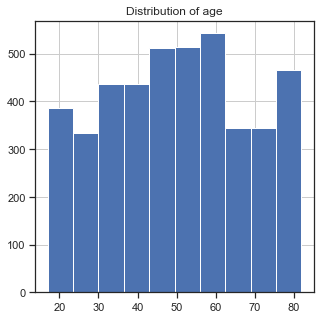

In [17]:
data_adult['age'].hist(figsize=(5,5))
plt.title('Distribution of age');

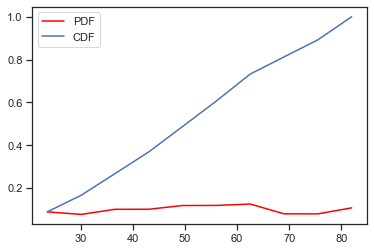

In [18]:
count, bins_count = np.histogram(data_adult['age'], bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend();

### 'age' feature has uniform distribution.

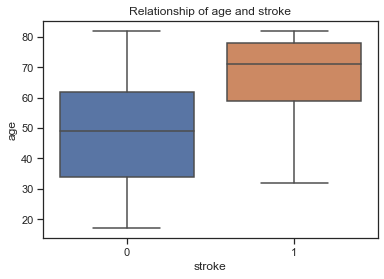

In [19]:
sns.boxplot(x='stroke', y='age', data=data_adult)
plt.title('Relationship of age and stroke');

In [20]:
data_adult['age_bin'] = pd.cut(data_adult['age'],
                         [0, 18, 30, 45, 60, 80, 99])

In [21]:
data_adult = data_adult.drop(columns=['age'])

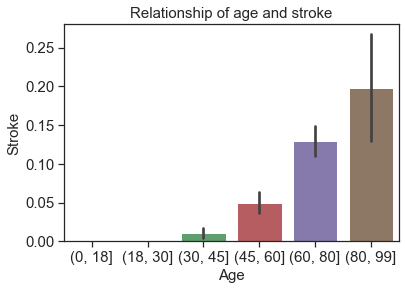

In [42]:
sns.barplot(x='age_bin', y='stroke', data=data_adult)
plt.title('Relationship of age and stroke',fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Stroke', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

### The stroke occurs more often in people of higher age.

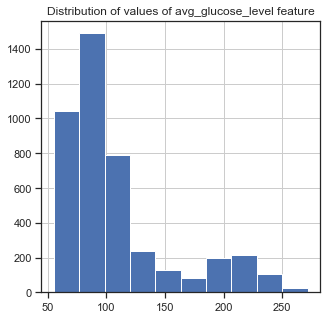

In [23]:
data_adult['avg_glucose_level'].hist(figsize=(5,5))
plt.title('Distribution of values of avg_glucose_level feature');

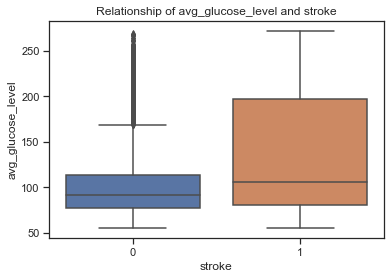

In [24]:
sns.boxplot(x='stroke', y='avg_glucose_level', data=data_adult)
plt.title('Relationship of avg_glucose_level and stroke');

In [25]:
for val in data_adult['avg_glucose_level']:
    if val < 140:
        data_adult['avg_glucose_level'].replace(to_replace=val, value='normal', inplace=True)
    elif val >= 140 and val < 200:
        data_adult['avg_glucose_level'].replace(to_replace=val, value='prediabetes', inplace=True)
    elif val >= 200:
        data_adult['avg_glucose_level'].replace(to_replace=val, value='diabetes', inplace=True)

In [26]:
data_adult.rename(columns = {'avg_glucose_level':'glucose_levels'}, inplace=True)

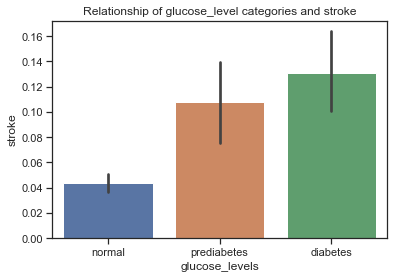

In [27]:
sns.barplot(x='glucose_levels',y='stroke',data=data_adult, order=["normal", "prediabetes","diabetes"])
plt.title('Relationship of glucose_level categories and stroke');

### Demographic features: gender,age

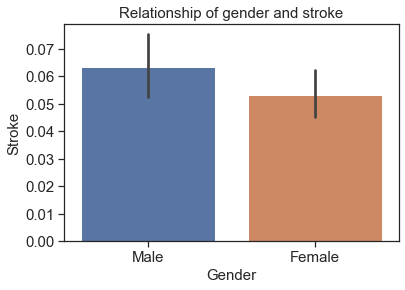

In [43]:
#fig, axes = plt.subplots(1,2,figsize=(10, 7))
sns.barplot(x='gender',y='stroke',data=data_adult)#ax=axes[0]
plt.title('Relationship of gender and stroke',fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Stroke', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

### Hypertension

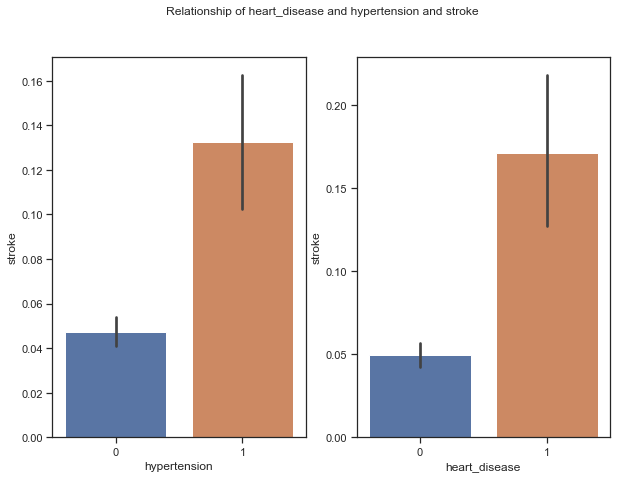

In [29]:
fig, axes = plt.subplots(1,2,figsize=(10, 7))
sns.barplot(ax=axes[0], x='hypertension',y='stroke',data=data_adult);
sns.barplot(ax=axes[1], x='heart_disease',y='stroke',data=data_adult);
fig.suptitle('Relationship of heart_disease and hypertension and stroke');

### Stress

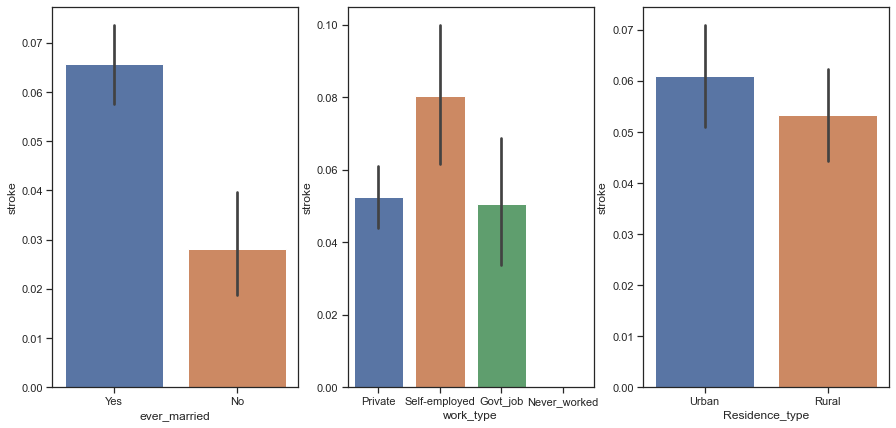

In [30]:
fig, axes = plt.subplots(1,3,figsize=(15, 7))
sns.barplot(ax=axes[0], x='ever_married',y='stroke',data=data_adult)
sns.barplot(ax=axes[1], x='work_type',y='stroke',data=data_adult)
sns.barplot(ax=axes[2], x='Residence_type',y='stroke',data=data_adult);

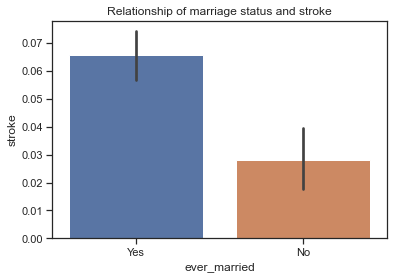

In [31]:
sns.barplot(x='ever_married',y='stroke',data=data_adult)
plt.title('Relationship of marriage status and stroke');

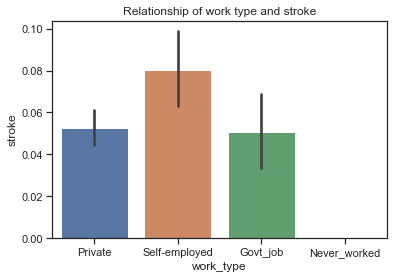

In [32]:
sns.barplot(x='work_type',y='stroke',data=data_adult)
plt.title('Relationship of work type and stroke');

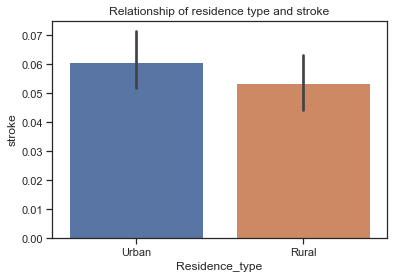

In [33]:
sns.barplot(x='Residence_type',y='stroke',data=data_adult)
plt.title('Relationship of residence type and stroke');

### Smoking status

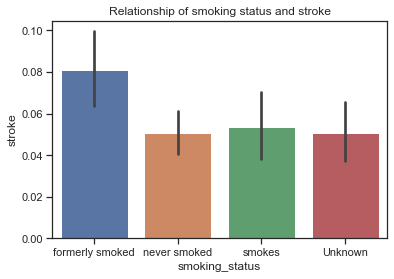

In [34]:
sns.barplot(x='smoking_status',y='stroke',data=data_adult)
plt.title('Relationship of smoking status and stroke');

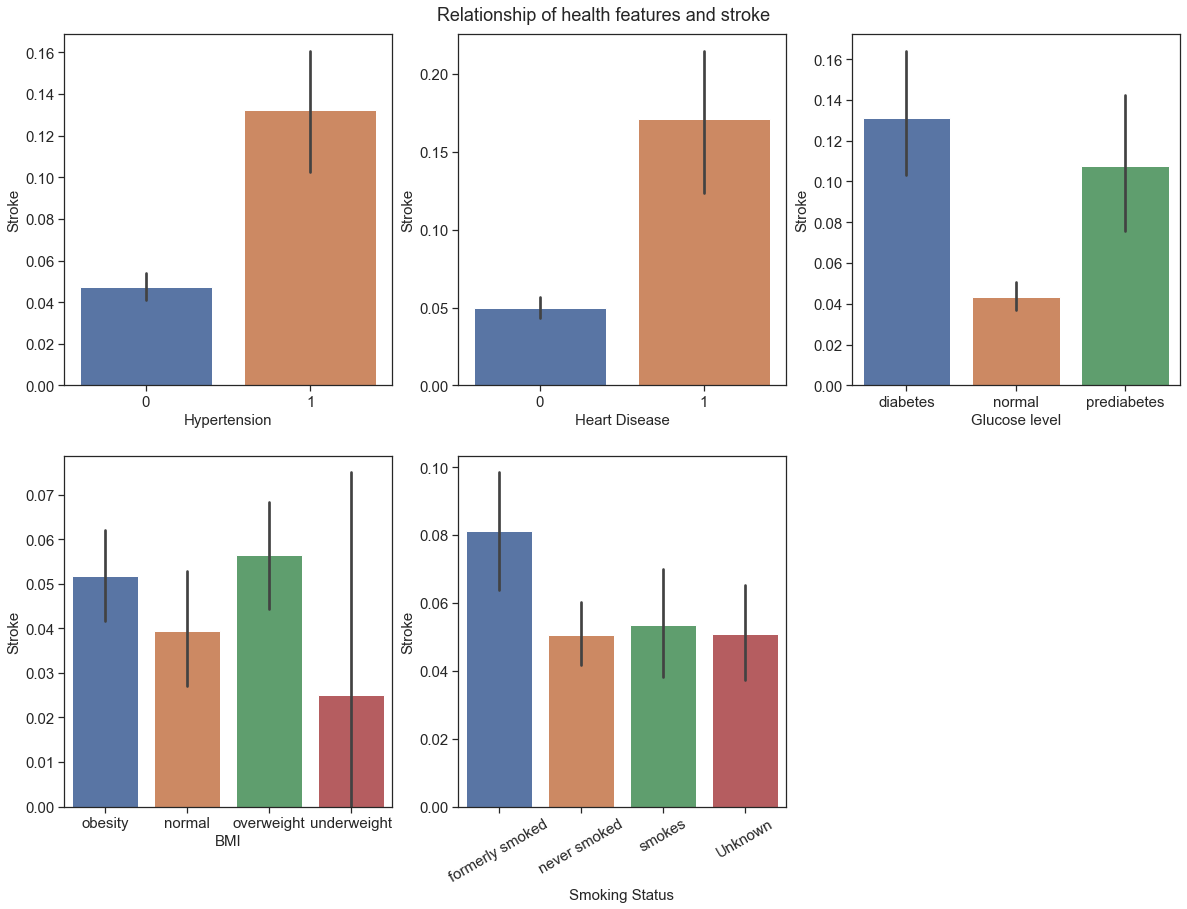

In [128]:
fig, ax =plt.subplots(2,3)
fig.suptitle('Relationship of health features and stroke')
fig.subplots_adjust(top=0.95)
sns.set_context(rc={"font.size":15,"axes.titlesize":5,"axes.labelsize":15,'xtick.labelsize' : 15,
'ytick.labelsize' : 15})
sns.barplot(x='hypertension',y='stroke',data=data_adult, ax =ax[0,0]).set(xlabel='Hypertension',ylabel='Stroke')
sns.barplot(x='heart_disease',y='stroke',data=data_adult, ax =ax[0,1]).set(xlabel='Heart Disease',ylabel='Stroke')
sns.barplot(x='glucose_levels',y='stroke',data=data_adult, ax =ax[0,2]).set(xlabel='Glucose level',ylabel='Stroke')
sns.barplot(x='bmi',y='stroke',data=data_adult, ax =ax[1,0]).set(xlabel='BMI',ylabel='Stroke')
sns.barplot(x='smoking_status',y='stroke',data=data_adult, ax =ax[1,1]).set(xlabel='Smoking Status',ylabel='Stroke')
ax[1,1].tick_params(axis='x',labelrotation=30)
fig.delaxes(ax=ax[1][2])
fig.set_size_inches(20, 13);

In [ ]:
fig, ax =plt.subplots(3,3)
sns.countplot(data=data,x='gender',ax =ax[0,0])
sns.countplot(data=data, x='ever_married',ax=ax[0,1])
sns.countplot(data=data,x='work_type',ax=ax[0,2])
sns.countplot(data=data,x='Residence_type',ax=ax[1,0])
sns.countplot(data=data,x='smoking_status',ax=ax[1,1])
sns.countplot(data=data,x='hypertension',ax=ax[1,2])
sns.countplot(data=data,x='heart_disease',ax=ax[2,0])
sns.countplot(data=data,x='stroke',ax=ax[2,1])
fig.delaxes(ax=ax[2][2])
fig.set_size_inches(18, 10)
fig.suptitle('Distribution of categorical variables',fontsize=20)
plt.show()

## Inferential statistics

### Cramer’s V can be used to calculate the correlation between nominal categorical variables.

In [ ]:
# Import association_metrics  
import association_metrics as am
# Convert you str columns to Category columns
df = data_adult.apply(
        lambda x: x.astype("category")) ##if x.dtype == "O" else x)
#df['bmi'] = df['bmi'].astype('object')
#df.bmi = df.bmi.fillna('unknown')
# Initialize a CamresV object using you pandas.DataFrame
cramersv = am.CramersV(df) 
# will return a pairwise matrix filled with Cramer's V, where columns and index are 
# the categorical variables of the passed pandas.DataFrame
res = cramersv.fit()

In [ ]:
res

In [ ]:
sns.heatmap(res);

## As we can see 'age_bin' and marriage_status show the strongest relationship with a score of ~ 0.6. 

### Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import minmax_scaling
import scipy.stats
from sklearn.metrics import roc_auc_score

## Chi square test
### Null hypothesis: Predictor variable and target variable are independent
### If chi square score is higher that a critical values, null hypothesis can be rejected.

In [ ]:
data_copy = data_adult.copy()
for col in data_copy.columns:
    data_copy[col] = LabelEncoder().fit_transform(data_copy[col])

In [ ]:
features = [col for col in data_copy.columns if col != 'stroke']
X = data_copy[features]
y = data_copy['stroke']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=246)

In [ ]:
p_values = {}
for col in X_train.columns:
    if col != 'stroke':
        crosstab = pd.crosstab(y_train, X_train[col])
        res = scipy.stats.chi2_contingency(crosstab)
        p_val = res[1]
        chi_2 = res[0]
        p_values[col] = [p_val,chi_2]

In [ ]:
p_values

In [ ]:
res = pd.DataFrame(p_values).T.reset_index(level=0)

In [ ]:
res = res.rename(columns={'index':'feature',0:'p_value',1:'chi_2'})

In [ ]:
res = res.sort_values(by='p_value',ascending=True).reset_index(drop=True)

In [ ]:
res[res['p_value'] <= 0.001]

In [ ]:
res

In [ ]:
critical_values = {}
for col in X_train.columns:
    if col != 'stroke':
        crosstab = pd.crosstab(y_train, X_train[col])
        df = (len(crosstab.index)-1)*(len(crosstab.columns)-1) #degrees of freedom
        crit_val = scipy.stats.chi2.ppf(0.95, df=df)
        critical_values[col] = crit_val

In [ ]:
crosstab = pd.crosstab(y_train, X_train["glucose_levels"].values == 1)
res = scipy.stats.chi2_contingency(crosstab)

In [ ]:
data_adult.glucose_levels.value_counts()

In [ ]:
X_train.glucose_levels.value_counts()

In [ ]:
X_train

In [ ]:
res

In [ ]:
crit_values = pd.DataFrame.from_dict(critical_values,orient='index')

In [ ]:
selection_model = SelectKBest(score_func=chi2, k=10).fit(X_train, y_train)
feature_score = pd.DataFrame({'features': X_train.columns.values, 'scores':selection_model.scores_})

In [ ]:
df = pd.merge(crit_values,feature_score,left_index=True, right_on='features')

In [ ]:
df = df.rename(columns={0:'critical value'})

In [ ]:
df.sort_values(by='scores',ascending=False).reset_index(drop=True)

In [ ]:
feature_score.sort_values(by='scores',ascending=False).plot(x='features',kind='bar',title='Chi-squared scores');

## As we can see, critical value is higher than chi square score for features 'work_type','smoking_status','Residence_type' and 'gender' indicating that these features and target feature are independent.

In [ ]:
data_adult.head()

## Building a model to get feature importance

In [ ]:
features = [col for col in data_adult.columns if col != 'stroke']
X = data_adult[features] 
y = data_adult[['stroke']] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=246)

In [ ]:
X_train_dummies = pd.get_dummies(X_train,drop_first=True)
X_test_dummies = pd.get_dummies(X_test,drop_first=True)

In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(objective= 'binary:logistic', eta=0.01, n_estimators=200, 
                        max_depth=8, colsample_bytree=0.8, seed=47, use_label_encoder=False)

In [ ]:
def replace_char(df):
    df.columns = df.columns.str.replace("_", "")
    df.columns = df.columns.str.replace(",", "")
    df.columns = df.columns.str.replace("]", "")
    df.columns = df.columns.str.replace("[", "")

In [ ]:
replace_char(X_train_dummies)
replace_char(X_test_dummies)

In [ ]:
xgb_clf.fit(X_train_dummies, y_train, verbose=True)

In [ ]:
y_pred_probs = xgb_clf.predict_proba(X_train_dummies)[:,1]
roc_auc_score(y_train.values, y_pred_probs)

In [ ]:
df_feature_imp = pd.DataFrame(X_train_dummies.columns,columns=['feature'])
df_feature_imp['importance'] = xgb_clf.feature_importances_
df_feature_imp.sort_values(by='importance', ascending=False, inplace=True)
df_featture_imp_top = df_feature_imp.head(20)

fig, ax = plt.subplots(figsize=(8,12))
sns.barplot(x ='importance', y='feature', data = df_featture_imp_top)
plt.title('Feature Importance - Top 20')
plt.show()